In [128]:
import pandas as pd

In [129]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [130]:
df_bookings.shape

(134590, 12)

In [131]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [132]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [133]:
#to know how many bookings were made per booking platform
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: ylabel='booking_platform'>

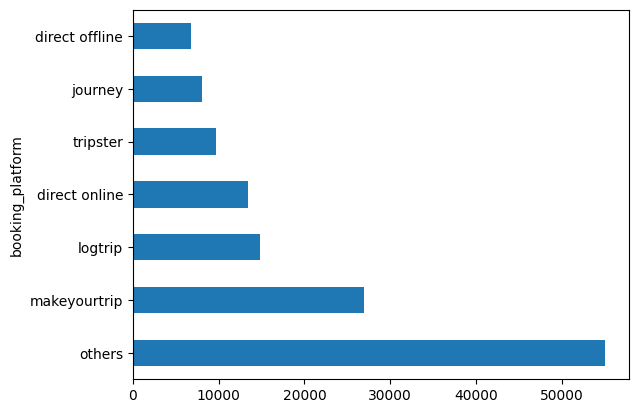

In [134]:
df_bookings.booking_platform.value_counts().plot(kind = "barh")

In [135]:
df_bookings.describe()   #to get quick statistics

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [136]:
df_bookings.revenue_generated.min() , df_bookings.revenue_generated.max()

(6500, 28560000)

In [137]:
#import remining files
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

In [138]:
df_bookings[df_bookings.no_guests<=0]    #We have some no of guests as -ve no. Check with manager. In this case we can just drop these

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [139]:
df_bookings = df_bookings[df_bookings.no_guests > 0]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [140]:
df_bookings.revenue_generated.min() , df_bookings.revenue_generated.max()

(6500, 28560000)

In [141]:
#Here revenue generated shows the revenue gen in 1 single booking. Its not possible to have >28million rev gen in single booking
#Thus the max value is an  outlier and we have to remove it
#Usually we can remove outliers that are more than 3 std dev away from mean
avg , std = df_bookings.revenue_generated.mean() , df_bookings.revenue_generated.std()
higher_limit = avg + 3*std
lower_limit  = avg - 3*std

In [142]:
df_bookings[df_bookings.revenue_generated <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [143]:
#So we have no -ve revenue generated. Therefore no need to check for lower limit.
#But we need to remove outliers > higher limit
df_bookings = df_bookings[ df_bookings.revenue_generated < higher_limit ]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [144]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [145]:
#we see that min and max are possible values 
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [146]:
# We see that all such high revenue gen belong to room categ RT4
# to check what is RT4
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [147]:
#We see RT4 is presidential suite and thus its possible to pay > 35k for such rooms - so apparently no need to drop these values
#so we can then check of there is an outlier in RT4 category and we can remove it
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [148]:
#we see max rev realized is < mean(23439) + 3std_dev(9048)
#Thus finally we can say no need to remove anything for RT4 also
#To handle null values
df_bookings.isnull()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,True,False,False,False
7,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,False,False,False,False,False,False,False,False,False,False,False,False
134585,False,False,False,False,False,False,False,False,False,False,False,False
134587,False,False,False,False,False,False,False,False,True,False,False,False
134588,False,False,False,False,False,False,False,False,False,False,False,False


In [149]:
#above returns a new dataframe that shows true whereve there is null values
#to better see values we can do
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [150]:
#we see there are 77897 null values in ratings given but this is OK as it is not necessary that a customer will always leave rating
df_agg_bookings.isnull().sum()
df_agg_bookings[df_agg_bookings.capacity.isna()]
df_agg_bookings = df_agg_bookings.fillna({
    "capacity" : df_agg_bookings.capacity.median()
})
df_agg_bookings.loc[[8,14]] 


,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


In [151]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]  #We need to drop these values
#successful bookings is always <= capcity
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

In [152]:
#in df_agg_booking - we want to add a new column occupation percentage as ratio of successful bookings to capacity
#Method 1
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [153]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [154]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x : round(x*100,2))
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


INSIGHTS GENERATION


In [155]:
#What is the average occupancy rate in each of the room category
df_g = df_agg_bookings.groupby("room_category").occ_pct.mean()
df_g

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

In [156]:
#instead of room id I want the room class name present in df_rooms
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [157]:
#This will give error as in df_g the column name is room _category and in df_rooms its room _id
#pd.merge(df_g , df_rooms , on = "room_id" )
df = pd.merge(df_agg_bookings , df_rooms , left_on = "room_category" , right_on = "room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard
...,...,...,...,...,...,...,...,...
9189,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9190,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9191,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9192,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [158]:
#on above df we can find the average occ_pct for each room_class
df.groupby("room_class").occ_pct.mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

Q2 -  Print average occupancy rate per city

In [159]:
df = pd.merge(df_agg_bookings , df_hotels , on = "property_id" , how = "left")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Atliq City,Business,Mumbai


In [160]:
df.groupby("city")["occ_pct"].mean().round(2)

city
Bangalore    56.33
Delhi        61.51
Hyderabad    58.12
Mumbai       57.91
Name: occ_pct, dtype: float64

WHEN WAS THE OCCUPANCY BETTER : WEEKDAY OR WEEKEND ?

In [161]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [162]:
df = pd.merge(df_agg_bookings , df_date , left_on = "check_in_date" , right_on = "date" )
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,10-May-22,May 22,W 20,weekeday


In [163]:
df.groupby("day_type").occ_pct.mean()

day_type
weekeday    50.883140
weekend     72.343625
Name: occ_pct, dtype: float64

IN THE MONTH OF JUNE WHAT IS THE OCCUPANCY FOR DIFFERENT CITIES

In [164]:
df = pd.merge(df_agg_bookings , df_hotels , on = "property_id" )
df = pd.merge(df , df_date , left_on = "check_in_date" , right_on = "date")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [165]:
df["mmm yy"].unique()     #This shows that we have data for 3 months but of same year .. so we need not worry for year

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [166]:
df = df[df["mmm yy"] == "Jun 22"]   #filtering only for june 2022
df.groupby("city").occ_pct.mean().round(2)

city
Bangalore    56.44
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Name: occ_pct, dtype: float64

I HAVE EXTRA DATA FOR AUGUST LOAD IT AND CONCAT IT - TO GET ALL DATA 1 DATAFRAME

In [167]:
df_august = pd.read_csv('datasets/new_data_august.csv')  #Read and store the new data
df_august.head(5)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [168]:
df = pd.merge(df_agg_bookings , df_hotels , on = "property_id" )
df = pd.merge(df , df_date , left_on = "check_in_date" , right_on = "date")
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT2,25,41.0,60.98,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT1,18,30.0,60.00,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday


In [172]:
df.shape

(6497, 13)

In [173]:
df_august.shape

(7, 13)

In [179]:
df_latest = pd.concat([df , df_august] , ignore_index = True , axis = 0) #axis =0 means concat rows
df_latest.shape   #we see no rows = 6497(original data) + 7(for august data)

(6504, 15)

PRINT REVENUE REALIZED PER CITY

In [184]:
#We have fin data in df_bookings and cities in df_hotels
#We need to group then all in 1 data frame
df_bookings_all = pd.merge(df_bookings , df_hotels , on = "property_id")
df_bookings_all.head(5)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [185]:
df_bookings_all.groupby("city").revenue_realized.sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

PRINT MONTH BY MONTH REVENUE

In [187]:
#we do not have month (mmm yy) in df_bookings_all
#thus we need to perform another join with df_date
#Also note the join will be performed on checkin date ( for df booking all ) and date (for df_date)
#Do not use booking date - as actual revenue is generated on check in date
pd.merge(df_bookings_all , df_date , left_on = "check_in_date" , right_on = "date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


In [189]:
#why do we get no data on performing above merge.
#Because merge was not successful.
#this was because the date formats - check in date in df_bookings_all and date in df_date are different
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [190]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [193]:
#Thus we see that date type is object in both data frames we want date type to to date format
df_date["date"] = pd.to_datetime(df_date["date"])   #to_datetime(<give column to convert>)
df_date.info()   #We see below that format has changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [195]:
#do same thing for df_bookings_all
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"] , format="mixed")   #the check in date column has values of mixed format
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [197]:
df_bookings_all = pd.merge(df_bookings_all , df_date , left_on = "check_in_date" , right_on = "date")  #merge works fine now

In [199]:
df_bookings_all.groupby("mmm yy").revenue_realized.sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

Print revenue realized per hotel type

In [203]:
df_bookings_all.groupby("property_name").revenue_realized.sum()

property_name
Atliq Bay        179416721
Atliq Blu        179203544
Atliq City       196555383
Atliq Exotica    219076161
Atliq Grands     145860641
Atliq Palace     209474575
Atliq Seasons     45920757
Name: revenue_realized, dtype: int64

Exercise-2 Print average rating per city

In [212]:
df_bookings_all.groupby("city").ratings_given.mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

<Axes: ylabel='revenue_realized'>

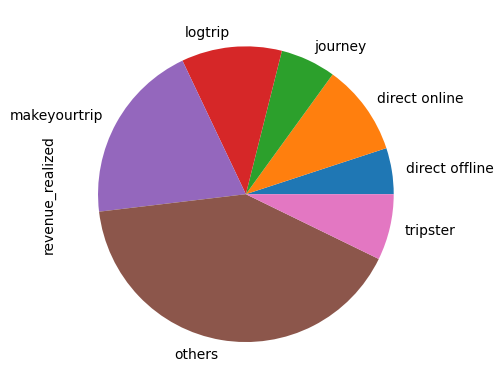

In [213]:
#xercise-3 Print a pie chart of revenue realized per booking platform
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")